In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.7.0'

In [134]:
keras.__version__

'2.7.0'

# 准备数据

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

In [6]:
x_train_full.dtype

dtype('uint8')

## 划分验证集并缩放

In [7]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Snearker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

# 顺序API构建图像分类器

## 基本结构

In [135]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # 将输入图像转化为一维数组，如果是回归任务则不需要
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 输出层为10个神经元，代表10个类别，分类器输出层有激活函数，回归任务没有
])

In [136]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.layers  # 层列表

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1

In [15]:
hidden1.name

'dense'

In [16]:
model.get_layer('dense')  # 按名称获取层

In [17]:
weights, biases = hidden1.get_weights()  # 获取权重参数和偏置项参数

In [18]:
weights

array([[-0.00968239,  0.03461326,  0.05846111, ..., -0.03392325,
        -0.00664008, -0.01606906],
       [-0.003957  ,  0.01952675, -0.04055088, ..., -0.04858923,
         0.01837832, -0.02100547],
       [-0.0414397 ,  0.03258554,  0.02129711, ..., -0.07195474,
        -0.02195781,  0.03715862],
       ...,
       [-0.0004601 , -0.06397507,  0.0267387 , ...,  0.0555315 ,
         0.02843712,  0.01336448],
       [ 0.03069062,  0.05461755,  0.03150493, ..., -0.02510052,
        -0.06976874,  0.00923341],
       [ 0.02781585, -0.00072756, -0.0319463 , ..., -0.0254439 ,
         0.0628563 ,  0.06016944]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [21]:
biases.shape

(300,)

## 指定损失函数和优化器等

In [22]:
model.compile(loss='sparse_categorical_crossentropy',  # 也可以写 loss = keras.losses.sparse_categorical_crossentropy
             optimizer='sgd',  # optimizer = keras.optimizer.SGD(lr=0.01)  可以指定学习率
             metrics=['accuracy'])  # metrics = keras.metrics.sparse_categorical_accuracy, 在分类器训练评估中测量'accuracy'很有用

```
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

## 训练和评估

In [23]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid)) 
# validation_data 用于指定验证集，改用validation_split = 0.1 可以指定验证集比例

Epoch 1/30
1719/1719 [==============================] - 4s 1ms/step - loss: 0.7200 - accuracy: 0.7609 - val_loss: 0.5278 - val_accuracy: 0.8172
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4891 - accuracy: 0.8307 - val_loss: 0.4442 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4433 - accuracy: 0.8452 - val_loss: 0.4178 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4160 - accuracy: 0.8546 - val_loss: 0.4003 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3956 - accuracy: 0.8609 - val_loss: 0.3793 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3789 - accuracy: 0.8654 - val_loss: 0.3852 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3657 - accuracy: 0.8708 - val_loss: 0.4080 - val_accuracy:

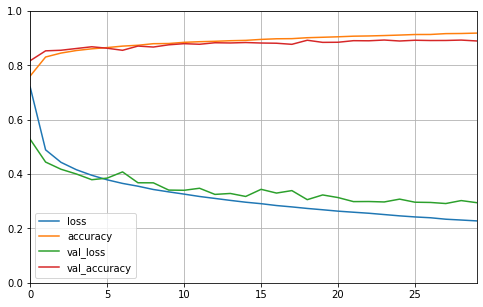

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 29)
plt.grid()
plt.show()

验证误差（绿色）是在每个轮次结束时计算的，训练误差（蓝色）是使用每个轮次的运行平均值计算的，因此训练曲线（蓝色）应该向左移动半个轮次，这样损失曲线几乎重合

训练集的性能最终会超过验证性能，验证损失仍然在下降，可以调用fit()继续训练

调整超参数，可以调整学习率、优化器、层数、每层神经元数以及激活函数类型、批处理大小（`fit()`中的`batch_size`参数，默认32）

In [25]:
model.evaluate(x_test, y_test)  # 还有batch_size，sample_weight等参数

313/313 [==============================] - 0s 812us/step - loss: 0.3324 - accuracy: 0.8816


[0.33239510655403137, 0.881600022315979]

In [26]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(3)  # predict() 输出概率

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.013, 0.   ,
        0.984],
       [0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(model.predict(x_new), axis=-1)  # 现在只能用np.argmax()方法
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
np.array(class_names)[y_pred]  # 对照名称输出

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new  # 检查真实标签，可以发现归类正确

array([9, 2, 1], dtype=uint8)

# 顺序API构建回归MLP

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [33]:
x_train.shape

(11610, 8)

In [34]:
x_train.shape[1:]

(8,)

In [35]:
x_test

array([[-0.07674998, -1.62899571, -0.15932493, ..., -0.0574223 ,
         1.39544332, -0.96816812],
       [ 2.17135801,  0.67494355,  0.22767014, ..., -0.0560652 ,
         1.06409971, -1.48177252],
       [-1.42027667,  0.67494355, -0.52585811, ...,  0.00942699,
        -0.70462179,  1.12115466],
       ...,
       [-0.81187034,  0.0393741 , -0.09373249, ..., -0.02891188,
         1.74078736, -1.06291068],
       [ 0.49433178,  1.31051301, -0.03514451, ..., -0.04823425,
         0.98943073, -1.46182672],
       [ 0.87552675,  0.11882028,  0.12712801, ..., -0.01552752,
        -1.30197364,  1.18099206]])

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),  # 输入层8个神经元（特征）
    keras.layers.Dense(1),  # 输出层1个神经元（返回一个值）
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)

Epoch 1/20
363/363 [==============================] - 1s 887us/step - loss: 0.7865 - val_loss: 0.6178
Epoch 2/20
363/363 [==============================] - 0s 681us/step - loss: 2.7287 - val_loss: 0.4909
Epoch 3/20
363/363 [==============================] - 0s 703us/step - loss: 0.5189 - val_loss: 0.4431
Epoch 4/20
363/363 [==============================] - 0s 678us/step - loss: 0.4561 - val_loss: 0.4184
Epoch 5/20
363/363 [==============================] - 0s 694us/step - loss: 0.4358 - val_loss: 0.4667
Epoch 6/20
363/363 [==============================] - 0s 728us/step - loss: 0.5962 - val_loss: 0.4097
Epoch 7/20
363/363 [==============================] - 0s 694us/step - loss: 0.4456 - val_loss: 0.4187
Epoch 8/20
363/363 [==============================] - 0s 689us/step - loss: 0.4293 - val_loss: 0.4029
Epoch 9/20
363/363 [==============================] - 0s 680us/step - loss: 0.4129 - val_loss: 0.3920
Epoch 10/20
363/363 [==============================] - 0s 675us/step - loss: 0.410

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [38]:
pd.DataFrame(history.history).head()

,loss,val_loss
0,0.786461,0.617785
1,2.728662,0.490946
2,0.518901,0.443066
3,0.456138,0.418413
4,0.435787,0.466656


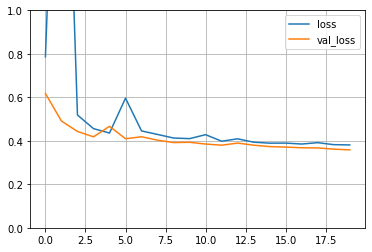

In [39]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 使用函数式API（宽深）

非顺序神经网络的一个示例——宽深神经网络，这种架构既可以实现常规深度学习，也可以通过短路径执行简单规则（可以提供手动设计的特征工程）

宽路径指跨越隐藏层的较短路径，深路径指包含多个隐藏层的较长路径

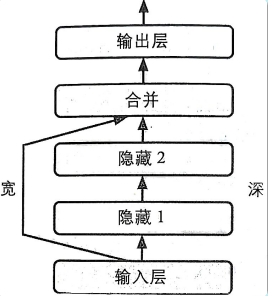

In [40]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)  # 类似调用函数，将输入层作文参数传入该层
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])  # 连接输入层和第二隐藏层
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [42]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
y_pred = model.predict(x_new)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.0999 - val_loss: 0.7421
Epoch 2/10
363/363 [==============================] - 0s 758us/step - loss: 0.7135 - val_loss: 0.6092
Epoch 3/10
363/363 [==============================] - 0s 906us/step - loss: 0.6325 - val_loss: 0.5934
Epoch 4/10
363/363 [==============================] - 0s 804us/step - loss: 0.6073 - val_loss: 0.5690
Epoch 5/10
363/363 [==============================] - 0s 747us/step - loss: 0.5922 - val_loss: 0.5586
Epoch 6/10
363/363 [==============================] - 0s 733us/step - loss: 0.5812 - val_loss: 0.5487
Epoch 7/10
363/363 [==============================] - 0s 739us/step - loss: 0.5696 - val_loss: 0.5407
Epoch 8/10
363/363 [==============================] - 0s 758us/step - loss: 0.5622 - val_loss: 0.5324
Epoch 9/10
363/363 [==============================] - 0s 738us/step - loss: 0.5544 - val_loss: 0.5295
Epoch 10/10
162/162 [==============================] - 0s 496us/step - loss: 0.5304


## 区分路径

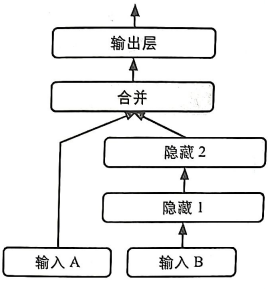

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
# 5个特征走宽路径，6个特征走深路径，通过两个输入层定义

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])  # 宽路径由此连接

output = keras.layers.Dense(1, name="output")(concat)  # 输出层

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])  # 输入层指定了两个，因此传入训练集、验证集、测试集也要匹配形状

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]  # 五个特征（0~4）
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]  # 六个特征（2~7）
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

history = model.fit((x_train_A, x_train_B), y_train, epochs=20,
                    validation_data=((x_valid_A, x_valid_B), y_valid))
mse_test = model.evaluate((x_test_A, x_test_B), y_test)
y_pred = model.predict((x_new_A, x_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8861 - val_loss: 0.7814
Epoch 2/20
363/363 [==============================] - 0s 835us/step - loss: 0.7410 - val_loss: 0.6413
Epoch 3/20
363/363 [==============================] - 0s 788us/step - loss: 0.6374 - val_loss: 0.5870
Epoch 4/20
363/363 [==============================] - 0s 832us/step - loss: 0.6015 - val_loss: 0.5628
Epoch 5/20
363/363 [==============================] - 0s 766us/step - loss: 0.5814 - val_loss: 0.5457
Epoch 6/20
363/363 [==============================] - 0s 780us/step - loss: 0.5643 - val_loss: 0.5323
Epoch 7/20
363/363 [==============================] - 0s 793us/step - loss: 0.5516 - val_loss: 0.5222
Epoch 8/20
363/363 [==============================] - 0s 796us/step - loss: 0.5395 - val_loss: 0.5113
Epoch 9/20
363/363 [==============================] - 0s 782us/step - loss: 0.5319 - val_loss: 0.5046
Epoch 10/20
363/363 [==============================] - 0s 791us/step - loss: 0.5256 

## 多输出

辅助输出用于观察网络的主要部分的学习效果

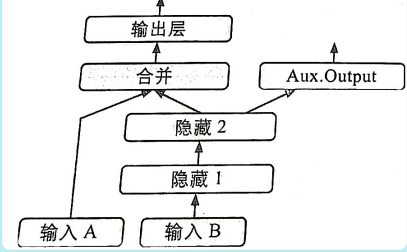

In [46]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])  # 合并

output = keras.layers.Dense(1, name="main_output")(concat)  # 主输出
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)  # 辅助输出

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [47]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')  # 更关心主输出，设置权重9:1

In [48]:
# 主输出和辅助输出应该预测出相同的结果，因此标签用[y_train, y_train]，验证集和测试集同理
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2686 - main_output_loss: 1.1843 - aux_output_loss: 2.0266 - val_loss: 0.6228 - val_main_output_loss: 0.5460 - val_aux_output_loss: 1.3141
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6123 - main_output_loss: 0.5359 - aux_output_loss: 1.2995 - val_loss: 0.5491 - val_main_output_loss: 0.4825 - val_aux_output_loss: 1.1485
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5569 - main_output_loss: 0.4929 - aux_output_loss: 1.1325 - val_loss: 0.5098 - val_main_output_loss: 0.4553 - val_aux_output_loss: 1.0006
Epoch 4/20
363/363 [==============================] - 0s 992us/step - loss: 0.5283 - main_output_loss: 0.4762 - aux_output_loss: 0.9971 - val_loss: 0.4853 - val_main_output_loss: 0.4400 - val_aux_output_loss: 0.8934
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5120 - main_output_loss: 0.4687 - aux_output_loss: 0.9019 - val_lo

In [49]:
total_loss, main_loss, aux_loss = model.evaluate(
    [x_test_A, x_test_B], [y_test, y_test])

162/162 [==============================] - 0s 700us/step - loss: 0.4008 - main_output_loss: 0.3854 - aux_output_loss: 0.5397


In [50]:
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

In [51]:
y_pred_main

array([[1.2369733 ],
       [4.0595145 ],
       [0.56709504]], dtype=float32)

In [52]:
y_pred_aux

array([[1.2009141],
       [3.3168094],
       [1.1419346]], dtype=float32)

# 构建动态模型（类封装）

In [53]:
class WideAndDeepModel(keras.models.Model):  # Model子类化
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # 继承父类的__init__并重写
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):  # 重写call()
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [54]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10,
                    validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.4470 - output_1_loss: 2.2738 - output_2_loss: 4.0055 - val_loss: 1.1870 - val_output_1_loss: 1.0091 - val_output_2_loss: 2.7881
Epoch 2/10
363/363 [==============================] - 0s 959us/step - loss: 1.0476 - output_1_loss: 0.8932 - output_2_loss: 2.4370 - val_loss: 0.8581 - val_output_1_loss: 0.7308 - val_output_2_loss: 2.0042
Epoch 3/10
363/363 [==============================] - 0s 948us/step - loss: 0.8237 - output_1_loss: 0.7114 - output_2_loss: 1.8346 - val_loss: 0.7310 - val_output_1_loss: 0.6406 - val_output_2_loss: 1.5442
Epoch 4/10
363/363 [==============================] - 0s 967us/step - loss: 0.7367 - output_1_loss: 0.6481 - output_2_loss: 1.5346 - val_loss: 0.6736 - val_output_1_loss: 0.5981 - val_output_2_loss: 1.3527
Epoch 5/10
363/363 [==============================] - 0s 946us/step - loss: 0.6889 - output_1_loss: 0.6117 - output_2_loss: 1.3833 - val_loss: 0.6389 - val_output_1_loss: 0.5718 

# 保存和还原模型

```
model.save('my_keras_model.h5')  # 保存

model = kareas.models.load_model('my_seras_model.h5')  # 读取
```

# 回调函数（断点续传）

## 定期保存

In [55]:
keras.backend.clear_session()

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [57]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(r"model/my_keras_model.h5", save_best_only=True)
# 保存最佳模型

In [58]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.2958 - val_loss: 1.0936
Epoch 2/10
363/363 [==============================] - 0s 884us/step - loss: 0.9789 - val_loss: 0.8937
Epoch 3/10
363/363 [==============================] - 0s 838us/step - loss: 0.7115 - val_loss: 0.6168
Epoch 4/10
363/363 [==============================] - 0s 824us/step - loss: 0.6370 - val_loss: 0.5808
Epoch 5/10
363/363 [==============================] - 0s 973us/step - loss: 0.6069 - val_loss: 0.5611
Epoch 6/10
363/363 [==============================] - 0s 970us/step - loss: 0.5844 - val_loss: 0.5427
Epoch 7/10
363/363 [==============================] - 0s 926us/step - loss: 0.5666 - val_loss: 0.5280
Epoch 8/10
363/363 [==============================] - 0s 827us/step - loss: 0.5521 - val_loss: 0.5166
Epoch 9/10
363/363 [==============================] - 0s 799us/step - loss: 0.5404 - val_loss: 0.5066
Epoch 10/10
363/363 [==============================] - 0s 810us/step - loss: 0.5298 

In [59]:
model = keras.models.load_model(r"model/my_keras_model.h5") # 取得最佳模型
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 527us/step - loss: 0.5046


## 提前停止

在`patience`轮验证集上的效果无明显进展时，停止训练，自动保存最佳模型

In [60]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

## 合并使用

In [61]:
history = model.fit(x_train, y_train, epochs=10,  # 在大型数据集可以设置较高的轮次，如1000
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])  # 合并
mse_test = model.evaluate(x_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 846us/step - loss: 0.5209 - val_loss: 0.4916
Epoch 2/10
363/363 [==============================] - 0s 846us/step - loss: 0.5132 - val_loss: 0.4838
Epoch 3/10
363/363 [==============================] - 0s 873us/step - loss: 0.5066 - val_loss: 0.4795
Epoch 4/10
363/363 [==============================] - 0s 862us/step - loss: 0.5004 - val_loss: 0.4728
Epoch 5/10
363/363 [==============================] - 0s 843us/step - loss: 0.4949 - val_loss: 0.4694
Epoch 6/10
363/363 [==============================] - 0s 824us/step - loss: 0.4898 - val_loss: 0.4648
Epoch 7/10
363/363 [==============================] - 0s 824us/step - loss: 0.4852 - val_loss: 0.4596
Epoch 8/10
363/363 [==============================] - 0s 832us/step - loss: 0.4812 - val_loss: 0.4566
Epoch 9/10
363/363 [==============================] - 0s 815us/step - loss: 0.4777 - val_loss: 0.4527
Epoch 10/10
162/162 [==============================] - 0s 527us/step - loss: 0.456

# 自定义回调函数

自定义额外的控制，比如每轮训练返回验证集和训练集损失比率，用于观察拟合情况

In [62]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [63]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/2
332/363 [==========================>...] - ETA: 0s - loss: 0.4643
val/train: 0.95
363/363 [==============================] - 0s 849us/step - loss: 0.4708 - val_loss: 0.4479
Epoch 2/2
308/363 [========================>.....] - ETA: 0s - loss: 0.4734
val/train: 0.95
363/363 [==============================] - 0s 824us/step - loss: 0.4678 - val_loss: 0.4441


# TensorBoard可视化

In [68]:
import os   
root_logdir = os.path.join(os.curdir, 'my_logs')  # 相对路径

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')  # 返回本地时间
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()  # 取得当前时间命名的摘要文件位置

In [69]:
run_logdir

'.\\my_logs\\run_2022_02_10-12_08_10'

In [76]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)  # 传入文件名（路径）即可
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid),
                    callbacks=[tensorboard_cb, checkpoint_cb])  
# 回调参数引用定义的tensorboard_cb和保存最佳模型的checkpoint_cb

Epoch 1/20
363/363 [==============================] - 0s 956us/step - loss: 0.4422 - val_loss: 0.4227
Epoch 2/20
363/363 [==============================] - 0s 923us/step - loss: 0.4408 - val_loss: 0.4203
Epoch 3/20
363/363 [==============================] - 0s 939us/step - loss: 0.4398 - val_loss: 0.4204
Epoch 4/20
363/363 [==============================] - 0s 959us/step - loss: 0.4384 - val_loss: 0.4179
Epoch 5/20
363/363 [==============================] - 0s 984us/step - loss: 0.4373 - val_loss: 0.4178
Epoch 6/20
363/363 [==============================] - 0s 888us/step - loss: 0.4360 - val_loss: 0.4167
Epoch 7/20
363/363 [==============================] - 0s 857us/step - loss: 0.4348 - val_loss: 0.4148
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4339 - val_loss: 0.4147
Epoch 9/20
363/363 [==============================] - 0s 992us/step - loss: 0.4330 - val_loss: 0.4127
Epoch 10/20
363/363 [==============================] - 0s 962us/step - loss: 0.4315 

在prompt终端输入命令：
`tensorboard --logdir=./my_logs --port=6006`
打开`tensorboard`

注意路径，必须带有路径

# 微调神经网络超参数

In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [139]:
# 创建一个函数用于根据参数生成并编译模型
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))  # 添加输入层
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))  # 添加隐藏层
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)  # 优化器
    model.compile(loss="mse", optimizer=optimizer)  # 编译
    return model

In [128]:
x_train.shape

(11610, 8)

## 模仿sklearn包装模型

包装之后可以类似`sklearn`调用`fit`，`score`和`predict`

In [255]:
from scikeras.wrappers import KerasRegressor  # KerasClassifier()从tf.keras独立出来了
keras_reg = KerasRegressor(build_model, n_neurons=1, n_hidden=1, learning_rate=0.01)  # 包装
# 定义KerasRegressor()实例时必须初始化必要的参数，否则网格搜索报错

In [256]:
# 包装完毕后可以调用类似sklearn的方法，如fit, score, predict
keras_reg.fit(x_train, y_train, epochs=10,
              validation_data=(x_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
363/363 [==============================] - 1s 989us/step - loss: 1.3900 - val_loss: 0.7544
Epoch 2/10
363/363 [==============================] - 0s 835us/step - loss: 0.7023 - val_loss: 0.6037
Epoch 3/10
363/363 [==============================] - 0s 763us/step - loss: 0.6110 - val_loss: 0.5508
Epoch 4/10
363/363 [==============================] - 0s 782us/step - loss: 0.5577 - val_loss: 0.5071
Epoch 5/10
363/363 [==============================] - 0s 785us/step - loss: 0.5239 - val_loss: 0.4865
Epoch 6/10
363/363 [==============================] - 0s 860us/step - loss: 0.5048 - val_loss: 0.4707
Epoch 7/10
363/363 [==============================] - 0s 766us/step - loss: 0.5031 - val_loss: 0.4916
Epoch 8/10
363/363 [==============================] - 0s 774us/step - loss: 0.5060 - val_loss: 0.4695
Epoch 9/10
363/363 [==============================] - 0s 780us/step - loss: 0.4909 - val_loss: 0.4621
Epoch 10/10
363/363 [==============================] - 0s 722us/step - loss: 0.492

KerasRegressor(
	model=<function build_model at 0x000002B68704B670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_neurons=1
	n_hidden=1
	learning_rate=0.01
)

In [257]:
mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)

1/1 [==============================] - 0s 12ms/step


In [258]:
mse_test

0.6075695222166689

In [259]:
y_pred

array([1.1503806 , 4.263288  , 0.96167964], dtype=float32)

## 网格搜索

(array([531., 132.,  79.,  57.,  40.,  48.,  26.,  29.,  26.,  32.]),
 array([0.00030025, 0.00325421, 0.00620817, 0.00916213, 0.01211609,
        0.01507005, 0.01802402, 0.02097798, 0.02393194, 0.0268859 ,
        0.02983986]),
 <BarContainer object of 10 artists>)

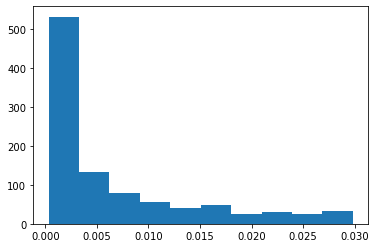

In [272]:
# 参数比较多，采用随机网格搜索
from scipy.stats import reciprocal  # 生成指定区间内的（倒数/反比例）随机变量
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
plt.hist(reciprocal(3e-4, 3e-2).rvs(1000))  # 反比例函数形式，仅用于展示reciprocal用途

In [261]:
param_distribs = {
    "n_hidden": [0, 1, 2],
    "n_neurons": np.arange(1, 5).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(5).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [262]:
rnd_search_cv.fit(x_train, y_train, epochs=10,
                  validation_data=(x_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# 要搜索相当多的参数组合，谨慎运行

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
242/242 [==============================] - 0s 1ms/step - loss: 6.7010 - val_loss: 4.7335
Epoch 2/10
242/242 [==============================] - 0s 832us/step - loss: 4.2953 - val_loss: 3.2142
Epoch 3/10
242/242 [==============================] - 0s 844us/step - loss: 2.9315 - val_loss: 2.2965
Epoch 4/10
242/242 [==============================] - 0s 973us/step - loss: 2.1188 - val_loss: 1.7214
Epoch 5/10
242/242 [==============================] - 0s 824us/step - loss: 1.6149 - val_loss: 1.3502
Epoch 6/10
242/242 [==============================] - 0s 935us/step - loss: 1.2922 - val_loss: 1.1061
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 1.0804 - val_loss: 0.9427
Epoch 8/10
242/242 [==============================] - 0s 1ms/step - loss: 0.9391 - val_loss: 0.8325
Epoch 9/10
242/242 [==============================] - 0s 939us/step - loss: 0.8434 - val_loss: 0.7572
Epoch 10/10
121/121 [======

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(learning_rate=0.01, model=<function build_model at 0x000002B68704B670>, n_hidden=1, n_neurons=1),
                   param_distributions={'learning_rate': [0.0003885626779073971,
                                                          0.003097032220712561,
                                                          0.0017385239188414362,
                                                          0.002678976859111158,
                                                          0.0006344564654937622],
                                        'n_hidden': [0, 1, 2],
                                        'n_neurons': [1, 2, 3, 4]},
                   verbose=2)

In [263]:
rnd_search_cv.best_params_

{'n_neurons': 3, 'n_hidden': 0, 'learning_rate': 0.0017385239188414362}

In [264]:
rnd_search_cv.best_score_

0.5464287929834919

In [265]:
rnd_search_cv.best_estimator_

KerasRegressor(
	model=<function build_model at 0x000002B68704B670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_neurons=3
	n_hidden=0
	learning_rate=0.0017385239188414362
)

In [266]:
rnd_search_cv.score(x_test, y_test)

162/162 [==============================] - 0s 459us/step


0.6149956528613277

此时的`model`不是`tensorflow`模型，可能与`scikeras`有关，因此不再有`evaluate`方法，`score`方法返回的值即可参考

In [269]:
model = rnd_search_cv.best_estimator_
model

KerasRegressor(
	model=<function build_model at 0x000002B68704B670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_neurons=3
	n_hidden=0
	learning_rate=0.0017385239188414362
)

## 其他超参数

1. 隐藏层数量：对于简单问题，从一两个隐藏层开始
2. 每个隐藏层的神经元数量：第一层的大于其他层的神经元数量，有时候是有帮助的
3. 学习率：一般最佳学习率约为最大学习率的一半，如果作学习率和损失的图像，最佳学习率在损失率刚刚开始回升的学习率的下方（低约10倍）
4. 优化器：除了SGD，还可以尝试其他优化器
5. 批量大小：一种策略是尝试使用大批量处理，慢慢最佳学习率，如果训练不稳定或结果不佳，再尝试小批量处理，一般默认为32个一组处理